In [60]:
#Auto reload
%reload_ext autoreload
%autoreload 2

from models.DeterministicModel import DeterministicModel
from models.HAPDModel import HAPDModel
from models.HindsightModel import HindsightModel
from utils.constants import *

In [61]:
hindsight_model = HindsightModel('Hindsight_test_py', HOURS_PER_YEAR)

Model Hindsight_test_py
Nominal wind: 10
Max wind: 10
Max hydrogen: 10
H min: 50
Number of features: 6
Test start index: 8640


In [63]:
models = [hindsight_model]
results = []

for model in models:
    result = model.evaluate(HOURS_PER_YEAR)
    print(model.name)
    results.append(result)
    model.save_results(result)

Hindsight_test_py
Results saved successfully.


In [70]:
results = hindsight_model.load_results()
print(results.get_total_objective())
print(results.__dict__.keys())

Results loaded successfully.
3473420.889705882
dict_keys(['forward_bids', 'deviations', 'hydrogen_productions', 'settlements', 'missing_productions', 'objectives'])


In [5]:
total_results = []
for model,result in zip(models, results):
    aux = [result, model.rule_based_adjustment(result), model.MPC_adjustment(result),model.best_adjustment(result)]
    total_results.append(aux)
    print(f"Model: {model.name} done")

In [13]:
for model, result in zip(models, total_results):
    model.save_results(result[0], 'original')
    model.save_results(result[1], 'rule_based_adj')
    model.save_results(result[2], 'MPC_adj')
    model.save_results(result[3], 'best_adj')

Results saved successfully.
Results saved successfully.
Results saved successfully.
Results saved successfully.
Results saved successfully.
Results saved successfully.
Results saved successfully.
Results saved successfully.
Results saved successfully.
Results saved successfully.
Results saved successfully.
Results saved successfully.


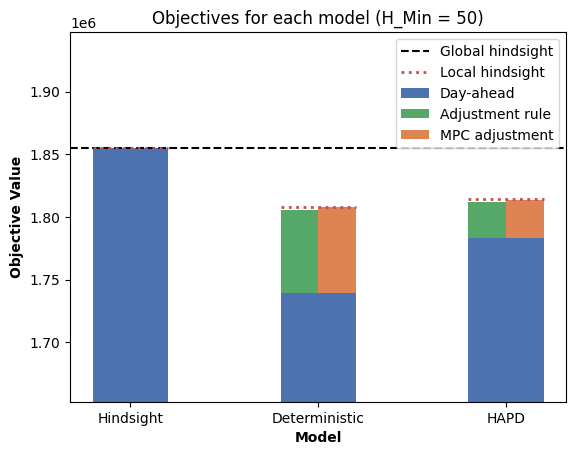

In [10]:
plot_objectives(total_results, ['Hindsight', 'Deterministic', 'HAPD'],'Objectives for each model (H_Min = 50)')

Model Hindsight_hmin50
Nominal wind: 10
Max wind: 10
Max hydrogen: 10
H min: 50
Number of features: 6
Test start index: 8640
Model Deterministic_hmin50
Nominal wind: 10
Max wind: 10
Max hydrogen: 10
H min: 50
Number of features: 6
Test start index: 8640
Model HAPD_hmin50
Nominal wind: 10
Max wind: 10
Max hydrogen: 10
H min: 50
Number of features: 6
Test start index: 8640
Set parameter Username
Academic license - for non-commercial use only - expires 2025-05-27
Weights successfully saved 
Hindsight_hmin50
1854669.007843137
Deterministic_hmin50
1739483.2565329392
HAPD_hmin50
1781216.880186961
Model: Hindsight_hmin50 done
Model: Deterministic_hmin50 done
Model: HAPD_hmin50 done
Results saved successfully.
Results saved successfully.
Results saved successfully.
Results saved successfully.
Results saved successfully.
Results saved successfully.
Results saved successfully.
Results saved successfully.
Results saved successfully.
Results saved successfully.
Results saved successfully.
Results 

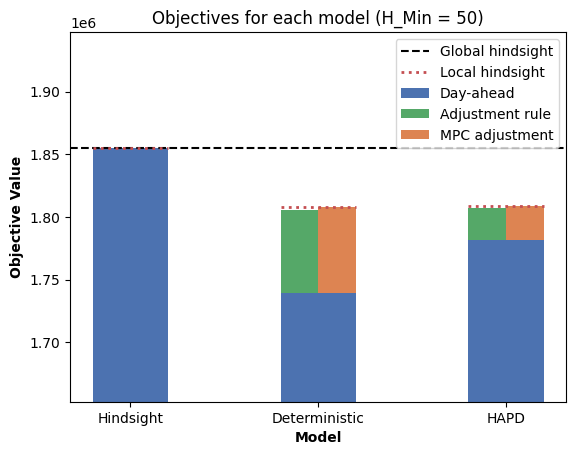

Model Hindsight_hmin100
Nominal wind: 10
Max wind: 10
Max hydrogen: 10
H min: 100
Number of features: 6
Test start index: 8640
Model Deterministic_hmin100
Nominal wind: 10
Max wind: 10
Max hydrogen: 10
H min: 100
Number of features: 6
Test start index: 8640
Model HAPD_hmin100
Nominal wind: 10
Max wind: 10
Max hydrogen: 10
H min: 100
Number of features: 6
Test start index: 8640
Weights successfully saved 
Hindsight_hmin100
1833794.9078431372
Deterministic_hmin100
1719643.256532939
HAPD_hmin100
1735639.2678934499
Model: Hindsight_hmin100 done
Model: Deterministic_hmin100 done
Model: HAPD_hmin100 done
Results saved successfully.
Results saved successfully.
Results saved successfully.
Results saved successfully.
Results saved successfully.
Results saved successfully.
Results saved successfully.
Results saved successfully.
Results saved successfully.
Results saved successfully.
Results saved successfully.
Results saved successfully.


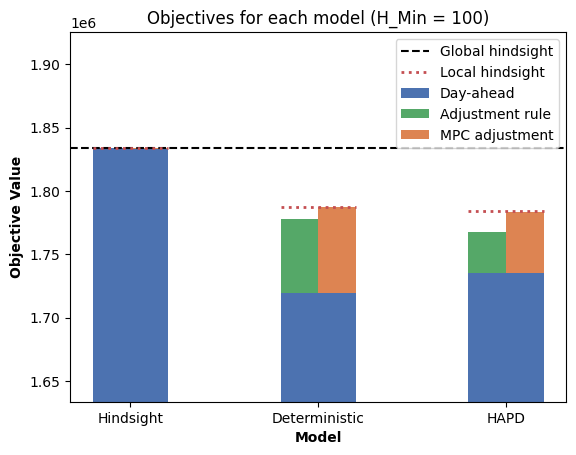

Model Hindsight_hmin150
Nominal wind: 10
Max wind: 10
Max hydrogen: 10
H min: 150
Number of features: 6
Test start index: 8640
Model Deterministic_hmin150
Nominal wind: 10
Max wind: 10
Max hydrogen: 10
H min: 150
Number of features: 6
Test start index: 8640
Model HAPD_hmin150
Nominal wind: 10
Max wind: 10
Max hydrogen: 10
H min: 150
Number of features: 6
Test start index: 8640
Weights successfully saved 
Hindsight_hmin150
1763889.807843137
Deterministic_hmin150
1651191.2565329392
HAPD_hmin150
1636432.323516238
Model: Hindsight_hmin150 done
Model: Deterministic_hmin150 done
Model: HAPD_hmin150 done
Results saved successfully.
Results saved successfully.
Results saved successfully.
Results saved successfully.
Results saved successfully.
Results saved successfully.
Results saved successfully.
Results saved successfully.
Results saved successfully.
Results saved successfully.
Results saved successfully.
Results saved successfully.


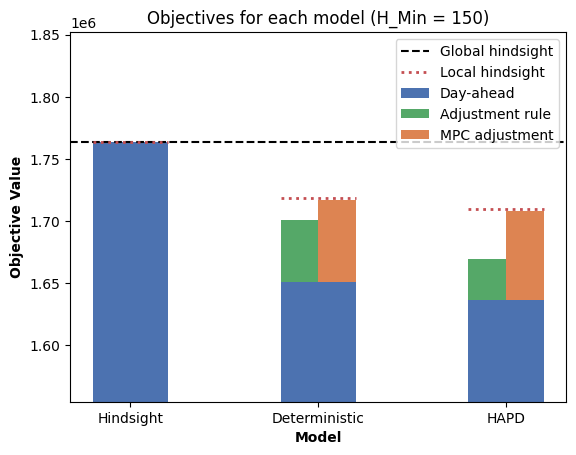

Model Hindsight_hmin200
Nominal wind: 10
Max wind: 10
Max hydrogen: 10
H min: 200
Number of features: 6
Test start index: 8640
Model Deterministic_hmin200
Nominal wind: 10
Max wind: 10
Max hydrogen: 10
H min: 200
Number of features: 6
Test start index: 8640
Model HAPD_hmin200
Nominal wind: 10
Max wind: 10
Max hydrogen: 10
H min: 200
Number of features: 6
Test start index: 8640
Weights successfully saved 
Hindsight_hmin200
1638002.9078431372


In [ ]:
for h_min in [50, 100, 150, 200]:
    hindsight_model = HindsightModel(f'Hindsight_hmin{h_min}', HOURS_PER_YEAR, h_min=h_min)
    deterministic_model = DeterministicModel(f'Deterministic_hmin{h_min}', HOURS_PER_YEAR, h_min=h_min)
    hapd_model = HAPDModel(f'HAPD_hmin{h_min}', HOURS_PER_YEAR, h_min=h_min)
    hapd_model.train(training_length=HOURS_PER_YEAR)
    models = [hindsight_model, deterministic_model, hapd_model]
    results = []

    for model in models:
        result = model.evaluate(HOURS_PER_YEAR)
        print(model.name)
        print(get_total_objective(result))
        results.append(result)
        
    total_results = []
    for model,result in zip(models, results):
        aux = [result, model.rule_based_adjustment(result), model.MPC_adjustment(result),model.best_adjustment(result)]
        total_results.append(aux)
        print(f"Model: {model.name} done")

    for model, result in zip(models, total_results):
        model.save_results(result[0], 'original')
        model.save_results(result[1], 'rule_based_adj')
        model.save_results(result[2], 'MPC_adj')
        model.save_results(result[3], 'best_adj')
    plot_objectives(total_results, ['Hindsight', 'Deterministic', 'HAPD'],f'Objectives for each model (H_Min = {h_min})')

Model Hindsight_hmin200
Nominal wind: 10
Max wind: 10
Max hydrogen: 10
H min: 200
Number of features: 6
Test start index: 8640
Model Deterministic_hmin200
Nominal wind: 10
Max wind: 10
Max hydrogen: 10
H min: 200
Number of features: 6
Test start index: 8640
Model HAPD_hmin200
Nominal wind: 10
Max wind: 10
Max hydrogen: 10
H min: 200
Number of features: 6
Test start index: 8640
Weights successfully loaded 
Set parameter Username
Academic license - for non-commercial use only - expires 2025-05-27
Hindsight_hmin200
1638002.9078431372
Deterministic_hmin200
1531048.256532939
HAPD_hmin200
1511789.7030119665
Model: Hindsight_hmin200 done
Model: Deterministic_hmin200 done
Model: HAPD_hmin200 done
Results saved successfully.
Results saved successfully.
Results saved successfully.
Results saved successfully.
Results saved successfully.
Results saved successfully.
Results saved successfully.
Results saved successfully.
Results saved successfully.
Results saved successfully.
Results saved successf

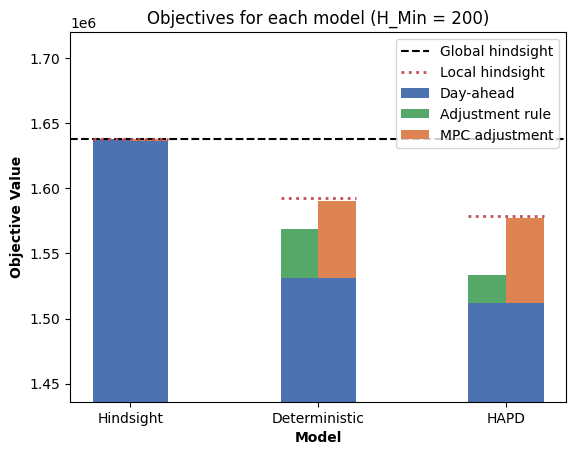

In [2]:
for h_min in [200]:
    hindsight_model = HindsightModel(f'Hindsight_hmin{h_min}', HOURS_PER_YEAR, h_min=h_min)
    deterministic_model = DeterministicModel(f'Deterministic_hmin{h_min}', HOURS_PER_YEAR, h_min=h_min)
    hapd_model = HAPDModel(f'HAPD_hmin{h_min}', HOURS_PER_YEAR, h_min=h_min)
    hapd_model.load_from_weights()
    models = [hindsight_model, deterministic_model, hapd_model]
    results = []

    for model in models:
        result = model.evaluate(HOURS_PER_YEAR)
        print(model.name)
        print(get_total_objective(result))
        results.append(result)
        
    total_results = []
    for model,result in zip(models, results):
        aux = [result, model.rule_based_adjustment(result), model.MPC_adjustment(result),model.best_adjustment(result)]
        total_results.append(aux)
        print(f"Model: {model.name} done")

    for model, result in zip(models, total_results):
        model.save_results(result[0], 'original')
        model.save_results(result[1], 'rule_based_adj')
        model.save_results(result[2], 'MPC_adj')
        model.save_results(result[3], 'best_adj')
    plot_objectives(total_results, ['Hindsight', 'Deterministic', 'HAPD'],f'Objectives for each model (H_Min = {h_min})')

In [4]:
deterministic_models = [DeterministicModel('Deterministic_hmin50', HOURS_PER_YEAR, h_min=50), DeterministicModel('Deterministic_hmin100', HOURS_PER_YEAR, h_min=100), DeterministicModel('Deterministic_hmin150', HOURS_PER_YEAR, h_min=150), DeterministicModel('Deterministic_hmin200', HOURS_PER_YEAR, h_min=200)]

deterministic_results = []

for model in deterministic_models:
    results = [model.load_results(flag) for flag in ['original', 'rule_based_adj', 'MPC_adj', 'best_adj']]
    deterministic_results.append(results)    

Model Deterministic_hmin50
Nominal wind: 10
Max wind: 10
Max hydrogen: 10
H min: 50
Number of features: 6
Test start index: 8640
Model Deterministic_hmin100
Nominal wind: 10
Max wind: 10
Max hydrogen: 10
H min: 100
Number of features: 6
Test start index: 8640
Model Deterministic_hmin150
Nominal wind: 10
Max wind: 10
Max hydrogen: 10
H min: 150
Number of features: 6
Test start index: 8640
Model Deterministic_hmin200
Nominal wind: 10
Max wind: 10
Max hydrogen: 10
H min: 200
Number of features: 6
Test start index: 8640
Results loaded successfully.
Results loaded successfully.
Results loaded successfully.
Results loaded successfully.
Results loaded successfully.
Results loaded successfully.
Results loaded successfully.
Results loaded successfully.
Results loaded successfully.
Results loaded successfully.
Results loaded successfully.
Results loaded successfully.
Results loaded successfully.
Results loaded successfully.
Results loaded successfully.
Results loaded successfully.


In [45]:
hindsight_models = [DeterministicModel('Hindsight_hmin50', HOURS_PER_YEAR, h_min=50), DeterministicModel('Hindsight_hmin100', HOURS_PER_YEAR, h_min=100), DeterministicModel('Hindsight_hmin150', HOURS_PER_YEAR, h_min=150), DeterministicModel('Hindsight_hmin200', HOURS_PER_YEAR, h_min=200)]

hindsight_results = []

for model in hindsight_models:
    results = [model.load_results(flag) for flag in ['original', 'rule_based_adj', 'MPC_adj', 'best_adj']]
    hindsight_results.append(results)    

Model Hindsight_hmin50
Nominal wind: 10
Max wind: 10
Max hydrogen: 10
H min: 50
Number of features: 6
Test start index: 8640
Model Hindsight_hmin100
Nominal wind: 10
Max wind: 10
Max hydrogen: 10
H min: 100
Number of features: 6
Test start index: 8640
Model Hindsight_hmin150
Nominal wind: 10
Max wind: 10
Max hydrogen: 10
H min: 150
Number of features: 6
Test start index: 8640
Model Hindsight_hmin200
Nominal wind: 10
Max wind: 10
Max hydrogen: 10
H min: 200
Number of features: 6
Test start index: 8640
Results loaded successfully.
Results loaded successfully.
Results loaded successfully.
Results loaded successfully.
Results loaded successfully.
Results loaded successfully.
Results loaded successfully.
Results loaded successfully.
Results loaded successfully.
Results loaded successfully.
Results loaded successfully.
Results loaded successfully.
Results loaded successfully.
Results loaded successfully.
Results loaded successfully.
Results loaded successfully.


In [46]:
HAPD_models = [DeterministicModel('HAPD_hmin50', HOURS_PER_YEAR, h_min=50), DeterministicModel('HAPD_hmin100', HOURS_PER_YEAR, h_min=100), DeterministicModel('HAPD_hmin150', HOURS_PER_YEAR, h_min=150), DeterministicModel('HAPD_hmin200', HOURS_PER_YEAR, h_min=200)]

HAPD_results = []

for model in HAPD_models:
    results = [model.load_results(flag) for flag in ['original', 'rule_based_adj', 'MPC_adj', 'best_adj']]
    HAPD_results.append(results)    

Model HAPD_hmin50
Nominal wind: 10
Max wind: 10
Max hydrogen: 10
H min: 50
Number of features: 6
Test start index: 8640
Model HAPD_hmin100
Nominal wind: 10
Max wind: 10
Max hydrogen: 10
H min: 100
Number of features: 6
Test start index: 8640
Model HAPD_hmin150
Nominal wind: 10
Max wind: 10
Max hydrogen: 10
H min: 150
Number of features: 6
Test start index: 8640
Model HAPD_hmin200
Nominal wind: 10
Max wind: 10
Max hydrogen: 10
H min: 200
Number of features: 6
Test start index: 8640
Results loaded successfully.
Results loaded successfully.
Results loaded successfully.
Results loaded successfully.
Results loaded successfully.
Results loaded successfully.
Results loaded successfully.
Results loaded successfully.
Results loaded successfully.
Results loaded successfully.
Results loaded successfully.
Results loaded successfully.
Results loaded successfully.
Results loaded successfully.
Results loaded successfully.
Results loaded successfully.


In [49]:
for results in deterministic_results:
    print(get_mao(results))

for results in hindsight_results:
    print(get_mao(results))
    
for results in HAPD_results:
    print(get_mao(results))

[518037.99999999977, 10155.0, 0.0]
[514464.50000000023, 43323.40000000037, 0.0]
[507980.4000000004, 123218.40000000037, 0.0]
[408073.0, 193638.3999999999, 0.0]
[0.0, 0.0, 0.0]
[0.0, 0.0, 0.0]
[0.0, 0.0, 0.0]
[0.0, 0.0, 0.0]
[473782.3823039476, 11874.600000000559, 0.0]
[501645.39009961253, 37129.820525061805, 0.0]
[530642.6522054649, 120014.82518189866, 0.0]
[440258.28230394796, 206294.75637551234, 0.0]


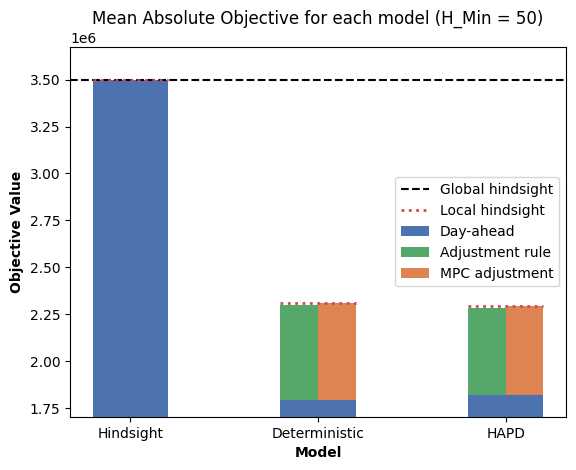

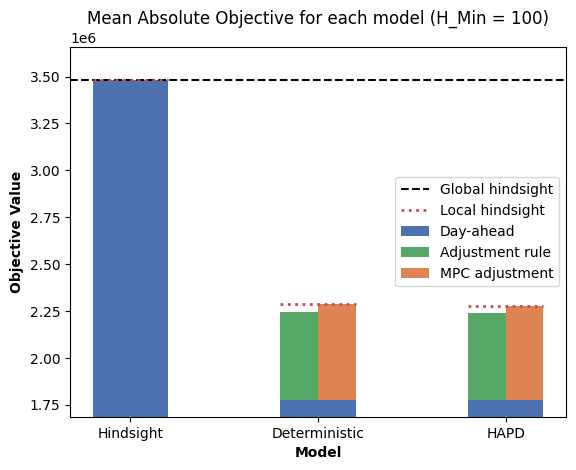

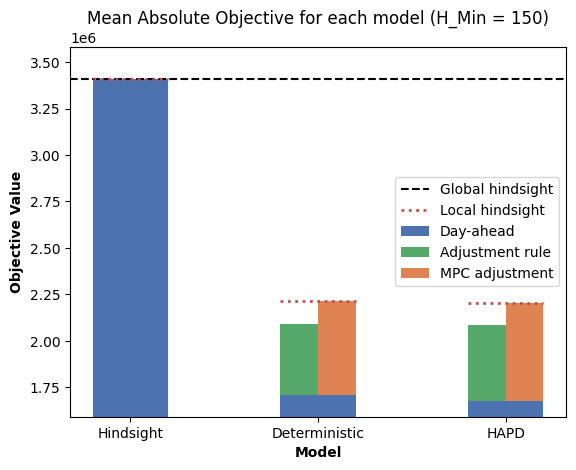

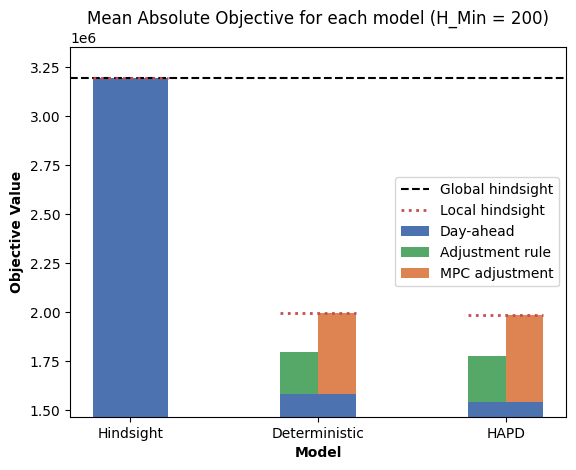

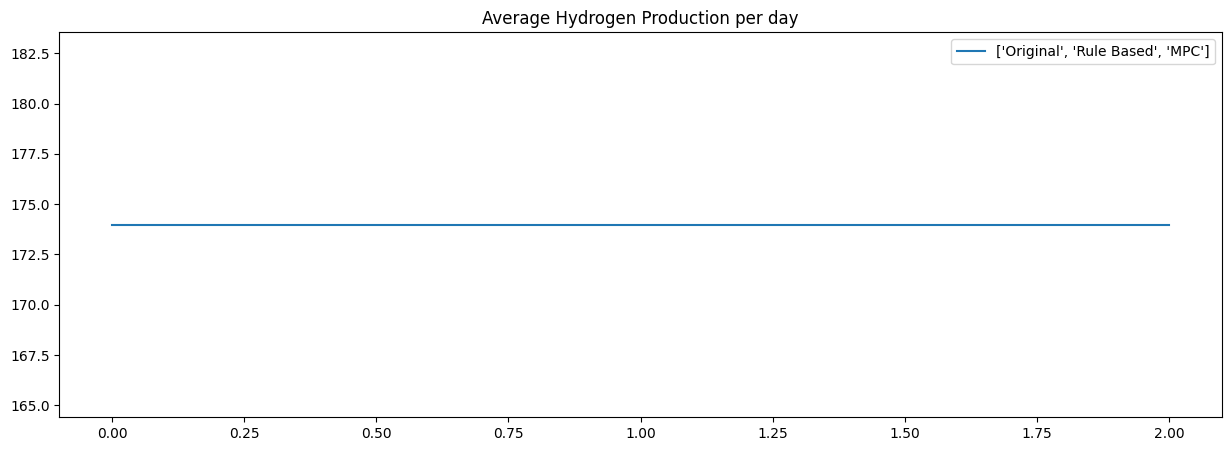

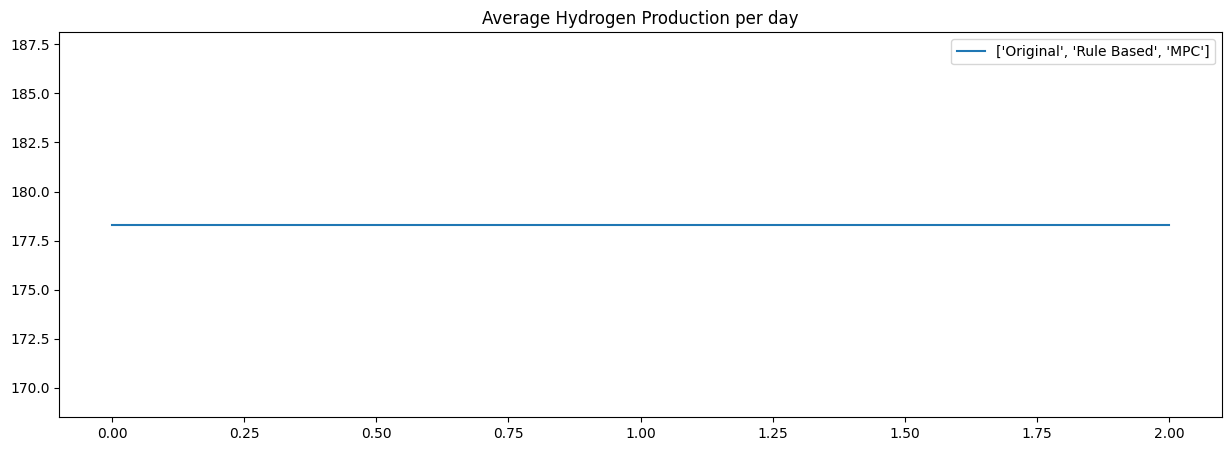

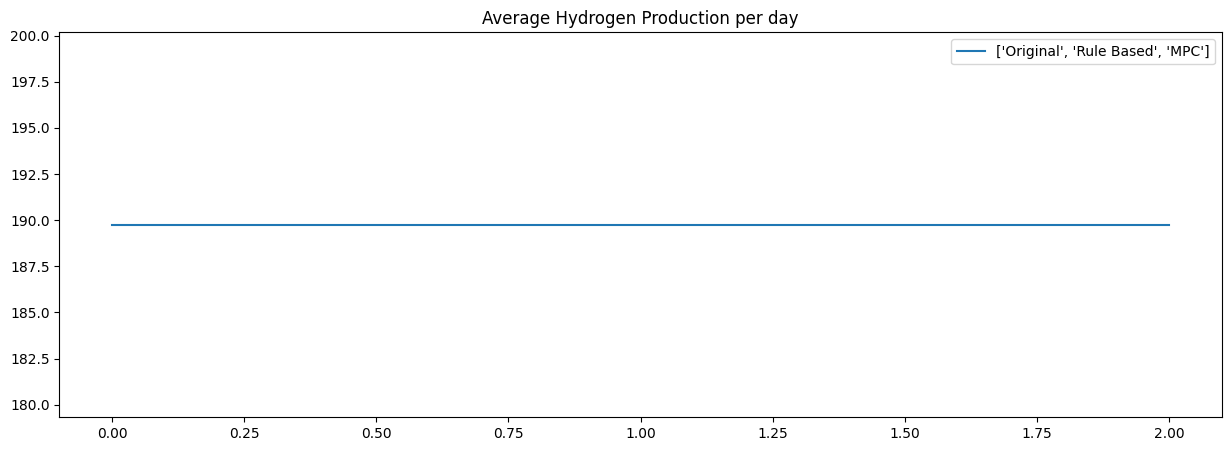

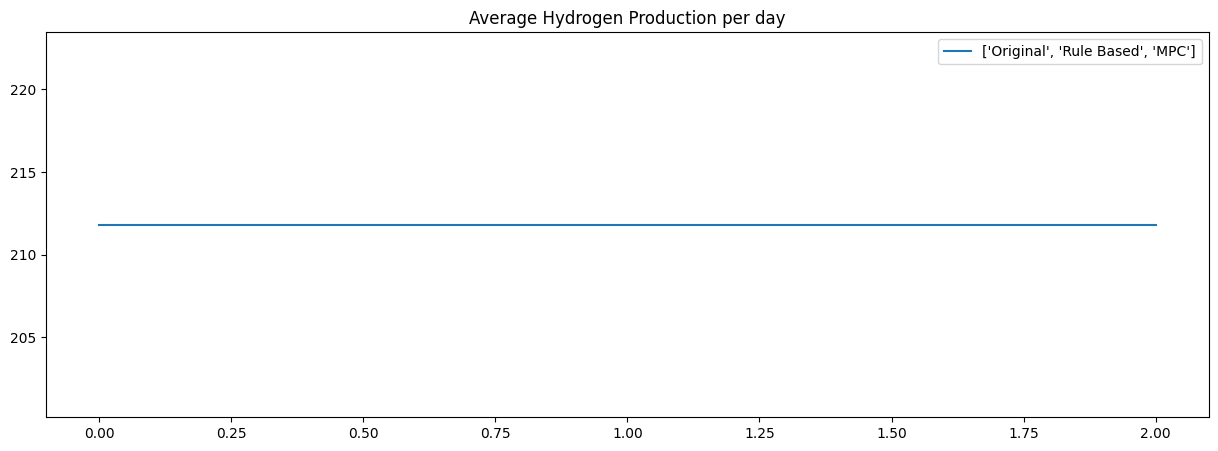

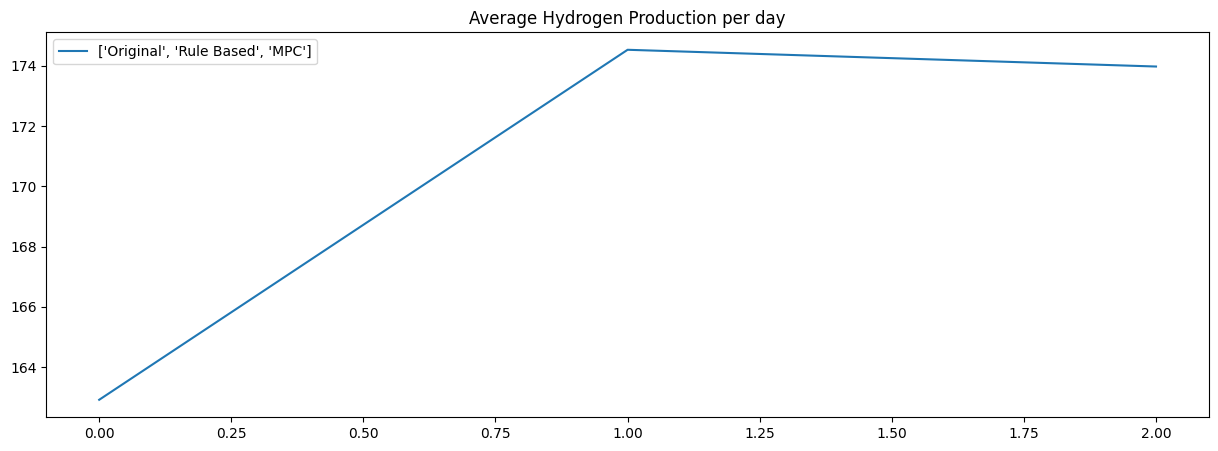

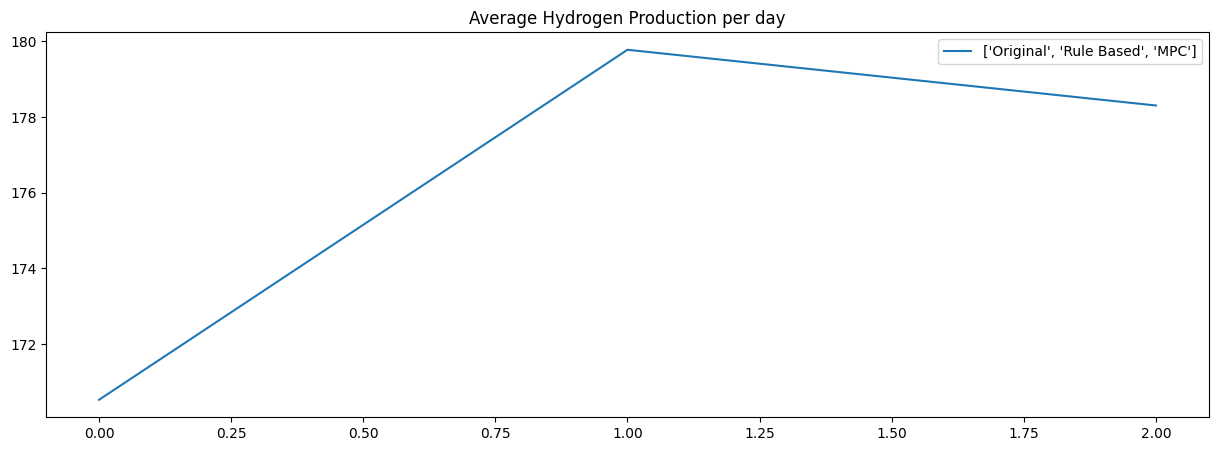

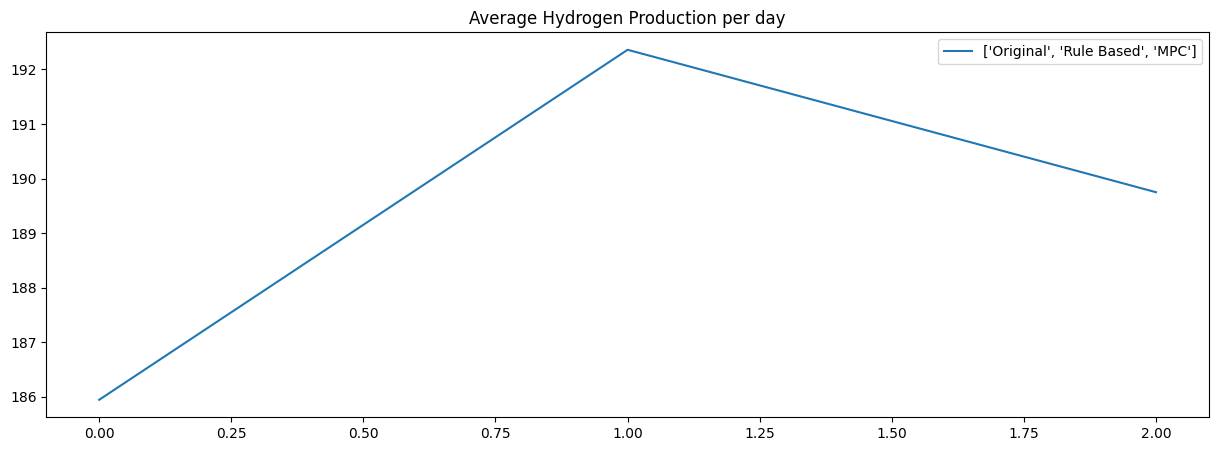

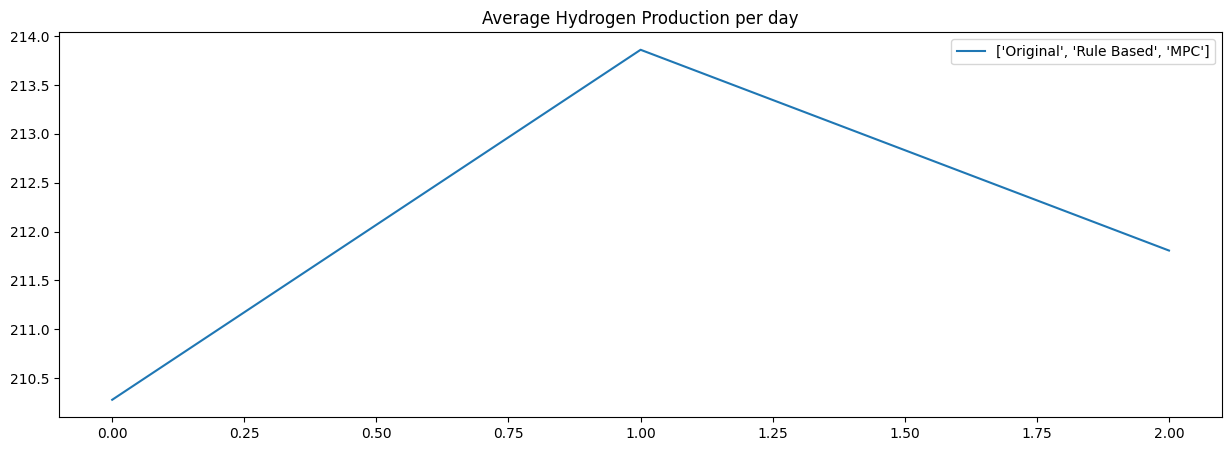

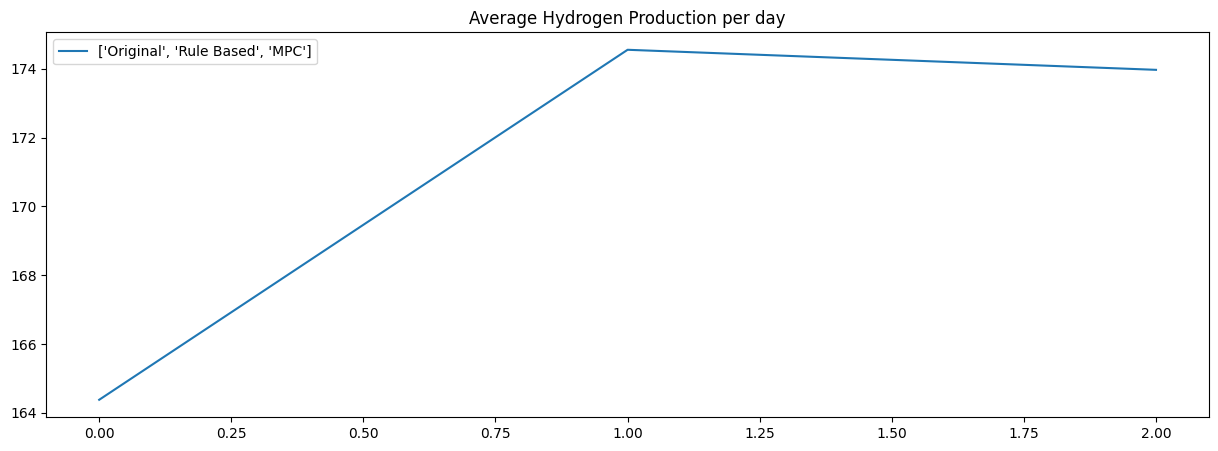

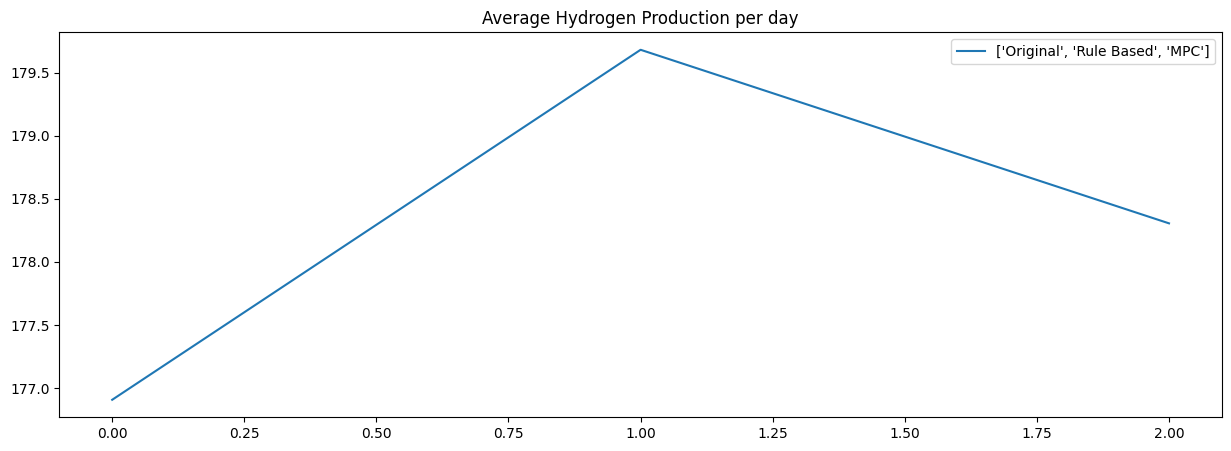

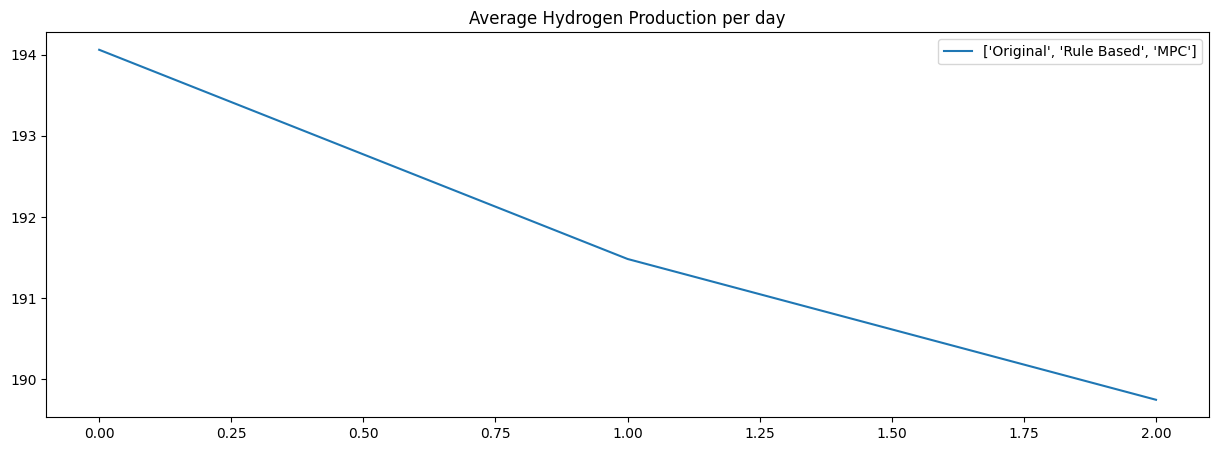

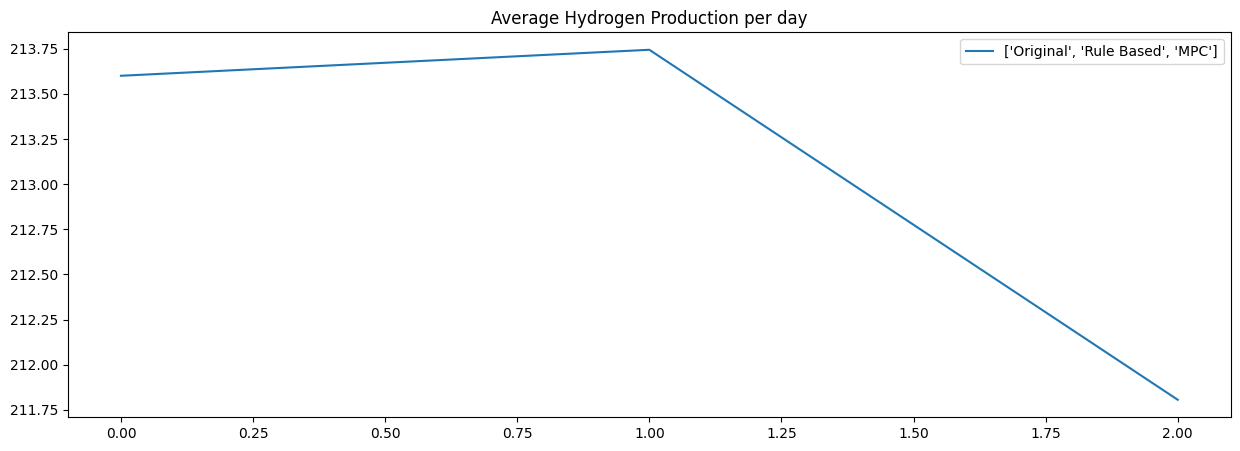

In [56]:
for i in range(4):
    plot_objectives([hindsight_results[i], deterministic_results[i], HAPD_results[i]], ['Hindsight','Deterministic', 'HAPD'], f'Mean Absolute Objective for each model (H_Min = {50 + i*50})')

for results in [hindsight_results, deterministic_results, HAPD_results]:
    for result in results:
        plt.figure(figsize=(15,5))
        # Plot the average hydrogen production per day
        plt.plot([get_average_hydrogen_production_per_day(result[0]), get_average_hydrogen_production_per_day(result[1]), get_average_hydrogen_production_per_day(result[2])], label=['Original', 'Rule Based', 'MPC'])
        plt.title('Average Hydrogen Production per day')
        plt.legend()
        plt.show()